In [1]:
!pip install ruptures

   ---------------------------------------- 0.0/380.8 kB ? eta -:--:--
   ---- ----------------------------------- 41.0/380.8 kB 2.0 MB/s eta 0:00:01
   ------- -------------------------------- 71.7/380.8 kB 1.3 MB/s eta 0:00:01
   --------------- ------------------------ 143.4/380.8 kB 1.1 MB/s eta 0:00:01
   ------------------ --------------------- 174.1/380.8 kB 1.1 MB/s eta 0:00:01
   ----------------------- ---------------- 225.3/380.8 kB 1.1 MB/s eta 0:00:01
   ----------------------------- ---------- 276.5/380.8 kB 1.0 MB/s eta 0:00:01
   ------------------------------- ------ 317.4/380.8 kB 984.6 kB/s eta 0:00:01
   ---------------------------------------  378.9/380.8 kB 1.0 MB/s eta 0:00:01
   -------------------------------------- 380.8/380.8 kB 988.2 kB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt

def detect_breakpoints_with_time(time_series, time_column):
    # Convert time series and time column to numpy arrays
    signal = np.array(time_series)
    time = np.array(time_column)

    # Specify the change point detection algorithm (e.g., Pelt)
    algo = rpt.Pelt(model="rbf").fit(signal)

    # Detect the change points
    result = algo.predict(pen=10)

    # Plot the time series with time information and detected breakpoints
    plt.figure(figsize=(12, 6))
    plt.plot(time, signal, label='Time Series')
    plt.title('Time Series with Breakpoints')
    plt.xlabel('Time')
    plt.ylabel('Value')

    for breakpoint in result:
        plt.axvline(x=time[breakpoint], color='r', linestyle='--', linewidth=2, label='Breakpoint')

    plt.legend()
    plt.show()

    return result

# Example usage
if __name__ == "__main__":
    # Load your CSV file with time and value columns
    df = pd.read_excel('WIP L section.xlsx', sheet_name='tlzero')

    # Assume df is your DataFrame

    # Choose the row index from where you want to start processing
    start_row_index = 32
    time_series_data_index = 0
    time_data_index = 1

    # Access the rows below the specified row and iterate over them
    for index, row in df.iloc[start_row_index:].iterrows():
        # Extract values from specific columns using positional indices
        time_series_data = row.iloc[time_series_data_index]
        time_data = row.iloc[time_data_index]

        # Perform your task here...

        # Detect breakpoints with time information
        breakpoints = detect_breakpoints_with_time([time_series_data], [time_data])

        print("Detected breakpoints at times:", [time_data[breakpoint] for breakpoint in breakpoints])


C:\Users\ratna\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ratna\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


BadSegmentationParameters: 

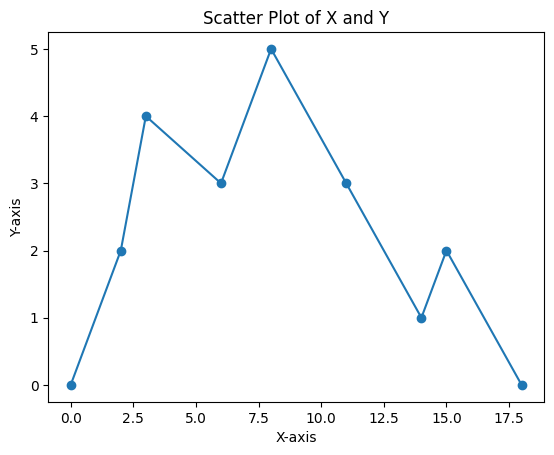

In [2]:
import matplotlib.pyplot as plt

# Assuming X and Y are your arrays
X = [0,2,3,6,8,11,14,15,18]
Y = [0,2,4,3,5,3,1,2,0]

# Plot the graph
plt.plot(X, Y, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of X and Y')

# Show the plot
plt.show()


In [3]:
!pip install ruptures.metrics

ERROR: Could not find a version that satisfies the requirement ruptures.metrics (from versions: none)
ERROR: No matching distribution found for ruptures.metrics


MSE for Initial Line: 7.555555555555555
Change Point Coordinates: (8, 5)


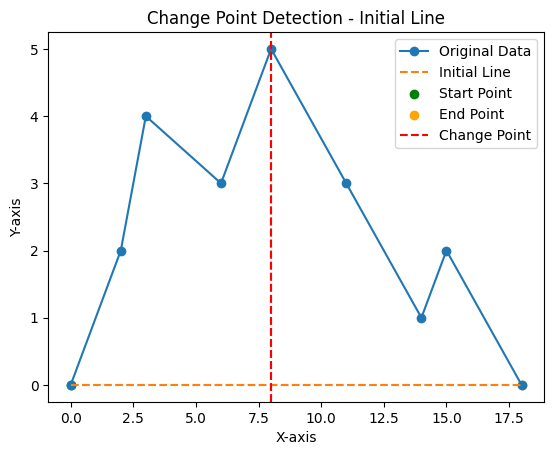

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt

# Define your data
X = [0, 2, 3, 6, 8, 11, 14, 15, 18]
Y = [0, 2, 4, 3, 5, 3, 1, 2, 0]

# Combine X and Y into a 2D array
data = np.array([X, Y]).T

# Function to calculate mean squared error
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Initial line connecting start and end points
initial_line = np.linspace(Y[0], Y[-1], len(Y))

# Calculate mean squared error for the initial line
initial_mse = calculate_mse(Y, initial_line)
print(f'MSE for Initial Line: {initial_mse}')

# Detect change point
change_point = np.argmax(np.abs(Y - initial_line))
change_point_coordinates = (X[change_point], Y[change_point])

# Plot the original data
plt.plot(X, Y, marker='o', linestyle='-', label='Original Data')

# Plot the initial line
plt.plot(X, initial_line, linestyle='--', label='Initial Line')

# Mark the start and end points
plt.scatter(X[0], Y[0], color='green', marker='o', label='Start Point')
plt.scatter(X[-1], Y[-1], color='orange', marker='o', label='End Point')

# Mark the change point with a red vertical dotted line
plt.axvline(x=X[change_point], color='red', linestyle='--', label='Change Point')
plt.axvline(x=X[change_point], color='red', linestyle='--')  # Vertical line through the change point

# Print change point coordinates
print(f'Change Point Coordinates: {change_point_coordinates}')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Change Point Detection - Initial Line')
plt.legend()
plt.show()


IndexError: index 9 is out of bounds for axis 0 with size 9

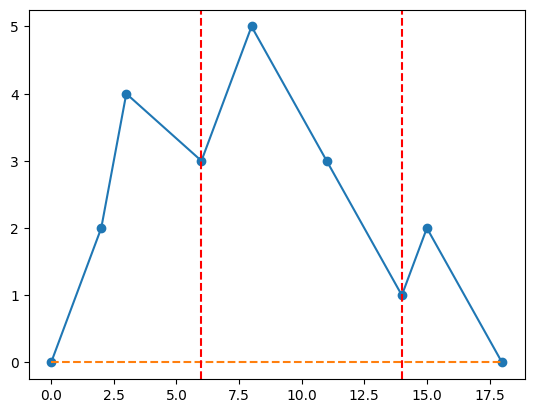

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt

# Define your data
X = np.array([0, 2, 3, 6, 8, 11, 14, 15, 18])
Y = np.array([0, 2, 4, 3, 5, 3, 1, 2, 0])

# Combine X and Y into a 2D array
data = np.array([X, Y]).T

# Function to calculate mean squared error
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Function to detect change points and plot results
def detect_change_points(X, Y, initial_line=True):
    # Combine X and Y into a 2D array
    data = np.array([X, Y]).T
    
    # Detect change points using the Dynp algorithm
    algo = rpt.Dynp(model="l2", jump=1).fit(data)
    result = algo.predict(n_bkps=2)  # Specify the number of change points to detect
    
    # Plot the original data
    plt.plot(X, Y, marker='o', linestyle='-', label='Original Data')
    
    # Plot the initial line
    if initial_line:
        initial_line = np.linspace(Y[0], Y[-1], len(Y))
        plt.plot(X, initial_line, linestyle='--', label='Initial Line')
    
    # Plot detected change points
    for cp in result:
        plt.axvline(x=X[cp], color='red', linestyle='--', label=f'Change Point {cp}')
    
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Change Point Detection')
    plt.legend()
    plt.show()

# Detect change points and plot results
detect_change_points(X, Y)

# Detect change points in segments on either side of the initial change point (8,5)
change_point = (8, 5)
left_segment = (X[0], change_point[0]), (Y[0], change_point[1])
right_segment = (change_point[0], X[-1]), (change_point[1], Y[-1])

for segment in [left_segment, right_segment]:
    print(f'\nDetecting Change Points in Segment: {segment}')
    detect_change_points(*segment, initial_line=False)


MSE for Initial Line: 64.50911991058805
Change Point Coordinates: (1300.0, 593.213)


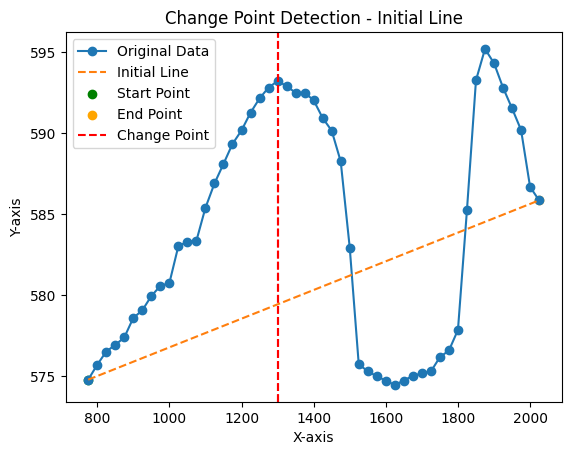

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt
import pandas as pd

# Load data from Excel sheet
file_name = "WIP L section.xlsx"  # Replace with your actual file name
sheet_name = "tlzero"  # Replace with your actual sheet name

# Read data from Excel sheet
df = pd.read_excel(file_name, sheet_name)

# Extract X and Y values from specific rows
start_row = 32
end_row = 82
X = df.iloc[start_row-1:end_row, 0].values  # Assuming X is in the first column
Y = df.iloc[start_row-1:end_row, 1].values  # Assuming Y is in the second column

# Combine X and Y into a 2D array
data = np.array([X, Y]).T

# Function to calculate mean squared error
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Initial line connecting start and end points
initial_line = np.linspace(Y[0], Y[-1], len(Y))

# Calculate mean squared error for the initial line
initial_mse = calculate_mse(Y, initial_line)
print(f'MSE for Initial Line: {initial_mse}')

# Detect change point
change_point = np.argmax(np.abs(Y - initial_line))
change_point_coordinates = (X[change_point], Y[change_point])

# Plot the original data
plt.plot(X, Y, marker='o', linestyle='-', label='Original Data')

# Plot the initial line
plt.plot(X, initial_line, linestyle='--', label='Initial Line')

# Mark the start and end points
plt.scatter(X[0], Y[0], color='green', marker='o', label='Start Point')
plt.scatter(X[-1], Y[-1], color='orange', marker='o', label='End Point')

# Mark the change point with a red vertical dotted line
plt.axvline(x=X[change_point], color='red', linestyle='--', label='Change Point')
plt.axvline(x=X[change_point], color='red', linestyle='--')  # Vertical line through the change point

# Print change point coordinates
print(f'Change Point Coordinates: {change_point_coordinates}')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Change Point Detection - Initial Line')
plt.legend()
plt.show()


MSE for Initial Line: 64.50911991058805
MSE for Line 1: 1.2484542904761557
MSE for Line 2: 90.14004260574721
Change Point 2 Coordinates: (1075.0, 583.357)
Change Point 3 Coordinates: (1625.0, 574.449)


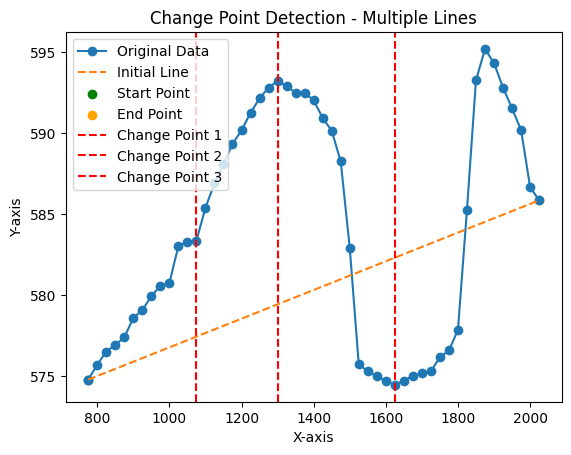

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt
import pandas as pd

# Load data from Excel sheet
file_name = "WIP L section.xlsx"  # Replace with your actual file name
sheet_name = "tlzero"  # Replace with your actual sheet name

# Read data from Excel sheet
df = pd.read_excel(file_name, sheet_name)

# Extract X and Y values from specific rows
start_row = 32
end_row = 82
X = df.iloc[start_row-1:end_row, 0].values  # Assuming X is in the first column
Y = df.iloc[start_row-1:end_row, 1].values  # Assuming Y is in the second column

# Combine X and Y into a 2D array
data = np.array([X, Y]).T

# Function to calculate mean squared error
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Initial line connecting start and end points
initial_line = np.linspace(Y[0], Y[-1], len(Y))

# Calculate mean squared error for the initial line
initial_mse = calculate_mse(Y, initial_line)
print(f'MSE for Initial Line: {initial_mse}')

# Detect initial change point
change_point = np.argmax(np.abs(Y - initial_line))
change_point_coordinates = (X[change_point], Y[change_point])

# Plot the original data
plt.plot(X, Y, marker='o', linestyle='-', label='Original Data')

# Plot the initial line
plt.plot(X, initial_line, linestyle='--', label='Initial Line')

# Mark the start and end points
plt.scatter(X[0], Y[0], color='green', marker='o', label='Start Point')
plt.scatter(X[-1], Y[-1], color='orange', marker='o', label='End Point')

# Mark the initial change point with a red vertical dotted line
plt.axvline(x=X[change_point], color='red', linestyle='--', label='Change Point 1')

# Fit lines to the two segments
line1 = np.linspace(Y[0], Y[change_point], len(Y[:change_point]))
line2 = np.linspace(Y[change_point], Y[-1], len(Y[change_point:]))

# Calculate mean squared error for the two lines
mse_line1 = calculate_mse(Y[:change_point], line1)
mse_line2 = calculate_mse(Y[change_point:], line2)
print(f'MSE for Line 1: {mse_line1}')
print(f'MSE for Line 2: {mse_line2}')

# Detect change points in Line 1
change_point_line1 = np.argmax(np.abs(Y[:change_point] - line1))
change_point_coordinates_line1 = (X[change_point_line1], Y[change_point_line1])

# Detect change points in Line 2
change_point_line2 = np.argmax(np.abs(Y[change_point:] - line2))
change_point_coordinates_line2 = (X[change_point + change_point_line2], Y[change_point + change_point_line2])

# Mark the additional change points with red vertical dotted lines
plt.axvline(x=X[change_point_line1], color='red', linestyle='--', label='Change Point 2')
plt.axvline(x=X[change_point + change_point_line2], color='red', linestyle='--', label='Change Point 3')

# Print additional change point coordinates
print(f'Change Point 2 Coordinates: {change_point_coordinates_line1}')
print(f'Change Point 3 Coordinates: {change_point_coordinates_line2}')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Change Point Detection - Multiple Lines')
plt.legend()
plt.show()


MSE for Current Line: 64.50911991058805
Change Point 4 Coordinates: (1300.0, 593.213)
MSE for Current Line: 64.50911991058805
Change Point 5 Coordinates: (1300.0, 593.213)
MSE for Current Line: 64.50911991058805
Change Point 6 Coordinates: (1300.0, 593.213)
MSE for Current Line: 64.50911991058805
Change Point 7 Coordinates: (1300.0, 593.213)
MSE for Current Line: 64.50911991058805
Change Point 8 Coordinates: (1300.0, 593.213)
Change Point 1 Coordinates: (1300.0, 593.213)
Change Point 2 Coordinates: (1300.0, 593.213)
Change Point 3 Coordinates: (1300.0, 593.213)
Change Point 4 Coordinates: (1300.0, 593.213)
Change Point 5 Coordinates: (1300.0, 593.213)


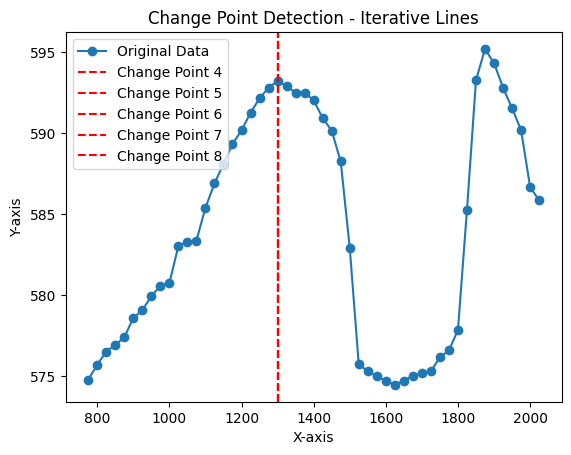

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load data from Excel sheet
file_name = "WIP L section.xlsx"  # Replace with your actual file name
sheet_name = "tlzero"  # Replace with your actual sheet name

# Read data from Excel sheet
df = pd.read_excel(file_name, sheet_name)

# Extract X and Y values from specific rows
start_row = 32
end_row = 82
X = df.iloc[start_row-1:end_row, 0].values  # Assuming X is in the first column
Y = df.iloc[start_row-1:end_row, 1].values  # Assuming Y is in the second column

# Combine X and Y into a 2D array
data = np.array([X, Y]).T

# Function to calculate mean squared error
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Plot the original data
plt.plot(X, Y, marker='o', linestyle='-', label='Original Data')

# Initialize variables
all_change_points = []

# Iterate to find additional change points
for iteration in range(5):
    # Fit a line to the current segment
    current_line = np.linspace(Y[0], Y[-1], len(Y))
    
    # Ensure X and current_line have the same length for interpolation
    x_interp = np.linspace(X[0], X[-1], len(current_line))
    
    # Interpolate the current line to have the same length as X
    interpolated_line = np.interp(X, x_interp, current_line)
    
    # Calculate mean squared error for the current line
    current_mse = calculate_mse(Y, interpolated_line)
    print(f'MSE for Current Line: {current_mse}')

    # Detect change point
    current_change_point = np.argmax(np.abs(Y - interpolated_line))
    current_change_point_coordinates = (X[current_change_point], Y[current_change_point])

    # Mark the change point with a red vertical dotted line
    plt.axvline(x=X[current_change_point], color='red', linestyle='--', label=f'Change Point {iteration + 4}')

    # Print change point coordinates
    print(f'Change Point {iteration + 4} Coordinates: {current_change_point_coordinates}')

    # Append the change point to the list
    all_change_points.append(current_change_point)

# Print the coordinates of all change points
for i, cp in enumerate(all_change_points):
    cp_coordinates = (X[cp], Y[cp])
    print(f'Change Point {i + 1} Coordinates: {cp_coordinates}')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Change Point Detection - Iterative Lines')
plt.legend()
plt.show()


MSE for Initial Line: 1196.6655602765663
MSE for Line 1: 1073.374864488094
MSE for Line 2: 1936.7199787670295
Change Point 2 Coordinates: (68200.0, 660.689)
Change Point 3 Coordinates: (140100.0, 661.867)
MSE for Line 3: 2949.6864623184624
MSE for Line 4: 1640.7734613918644


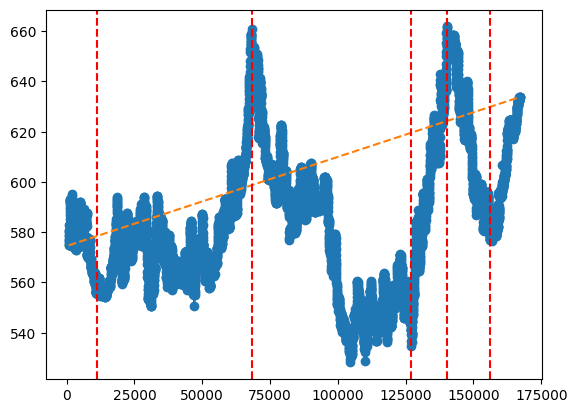

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load data from Excel sheet
file_name = "WIP L section.xlsx"  # Replace with your actual file name
sheet_name = "tlzero"  # Replace with your actual sheet name

# Read data from Excel sheet
df = pd.read_excel(file_name, sheet_name)

# Extract X and Y values from specific rows
start_row = 32
end_row = 6684
X = df.iloc[start_row-1:end_row, 0].values  # Assuming X is in the first column
Y = df.iloc[start_row-1:end_row, 1].values  # Assuming Y is in the second column

# Combine X and Y into a 2D array
data = np.array([X, Y]).T

# Function to calculate mean squared error
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Initial line connecting start and end points
initial_line = np.linspace(Y[0], Y[-1], len(Y))

# Calculate mean squared error for the initial line
initial_mse = calculate_mse(Y, initial_line)
print(f'MSE for Initial Line: {initial_mse}')

# Detect initial change point
change_point = np.argmax(np.abs(Y - initial_line))
change_point_coordinates = (X[change_point], Y[change_point])

# Plot the original data
plt.plot(X, Y, marker='o', linestyle='-', label='Original Data')

# Plot the initial line
plt.plot(X, initial_line, linestyle='--', label='Initial Line')

# Mark the start and end points
plt.scatter(X[0], Y[0], color='green', marker='o', label='Start Point')
plt.scatter(X[-1], Y[-1], color='orange', marker='o', label='End Point')

# Mark the initial change point with a red vertical dotted line
plt.axvline(x=X[change_point], color='red', linestyle='--', label='Change Point 1')

# Fit lines to the two segments
line1 = np.linspace(Y[0], Y[change_point], len(Y[:change_point]))
line2 = np.linspace(Y[change_point], Y[-1], len(Y[change_point:]))

# Calculate mean squared error for the two lines
mse_line1 = calculate_mse(Y[:change_point], line1)
mse_line2 = calculate_mse(Y[change_point:], line2)
print(f'MSE for Line 1: {mse_line1}')
print(f'MSE for Line 2: {mse_line2}')

# Detect change points in Line 1
change_point_line1 = np.argmax(np.abs(Y[:change_point] - line1))
change_point_coordinates_line1 = (X[change_point_line1], Y[change_point_line1])

# Detect change points in Line 2
change_point_line2 = np.argmax(np.abs(Y[change_point:] - line2))
change_point_coordinates_line2 = (X[change_point + change_point_line2], Y[change_point + change_point_line2])

# Mark the additional change points with red vertical dotted lines
plt.axvline(x=X[change_point_line1], color='red', linestyle='--', label='Change Point 2')
plt.axvline(x=X[change_point + change_point_line2], color='red', linestyle='--', label='Change Point 3')

# Print additional change point coordinates
print(f'Change Point 2 Coordinates: {change_point_coordinates_line1}')
print(f'Change Point 3 Coordinates: {change_point_coordinates_line2}')

# Continue finding change points between Change Point 2 and the start point
# and between Change Point 3 and the end point

# Fit lines to the two segments
line3 = np.linspace(Y[change_point_line1], Y[0], len(Y[:change_point_line1]))
line4 = np.linspace(Y[change_point_line2 + change_point], Y[-1], len(Y[change_point_line2 + change_point:]))

# Calculate mean squared error for the two lines
mse_line3 = calculate_mse(Y[:change_point_line1], line3)
mse_line4 = calculate_mse(Y[change_point_line2 + change_point:], line4)
print(f'MSE for Line 3: {mse_line3}')
print(f'MSE for Line 4: {mse_line4}')

# Detect change points in Line 3
change_point_line3 = np.argmax(np.abs(Y[:change_point_line1] - line3))
change_point_coordinates_line3 = (X[change_point_line3], Y[change_point_line3])

# Detect change points in Line 4
change_point_line4 = np.argmax(np.abs(Y[change_point_line2 + change_point:] - line4))
change_point_coordinates_line4 = (X[change_point_line2 + change_point + change_point_line4], Y[change_point_line2 + change_point + change_point_line4])

# Mark the additional change points with red vertical dotted lines
plt.axvline(x=X[change_point_line3], color='red', linestyle='--', label='Change Point 4')
plt.axvline(x=X[change_point_line2 + change_point + change_point_line4], color='red', linestyle='--', label='Change Point 5')

# Print additional change point coordinates


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load data from Excel sheet
file_name = "WIP L section.xlsx"  # Replace with your actual file name
sheet_name = "tlzero"  # Replace with your actual sheet name

# Read data from Excel sheet
df = pd.read_excel(file_name, sheet_name)

# Extract X and Y values from specific rows
start_row = 32
end_row = 6684
X = df.iloc[start_row-1:end_row, 0].values  # Assuming X is in the first column
Y = df.iloc[start_row-1:end_row, 1].values  # Assuming Y is in the second column

# Combine X and Y into a 2D array
data = np.array([X, Y]).T

# Function to calculate mean squared error
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Initial line connecting start and end points
initial_line = np.linspace(Y[0], Y[-1], len(Y))

# Calculate mean squared error for the initial line
initial_mse = calculate_mse(Y, initial_line)
print(f'MSE for Initial Line: {initial_mse}')

# List to store all change points
all_change_points = []

# Threshold for MSE
mse_threshold = 200

# Maximum number of change points
max_change_points = 101

for _ in range(max_change_points):
    # Detect initial change point
    change_point = np.argmax(np.abs(Y - initial_line))

    # Add change point to the list
    all_change_points.append(change_point)

    # Fit lines to the two segments
    line_segments = [np.linspace(Y[all_change_points[i]], Y[all_change_points[i + 1]], len(Y[all_change_points[i]:all_change_points[i + 1]])) for i in range(len(all_change_points) - 1)]
    
    # Update the initial line using all detected change points
    initial_line = np.concatenate(line_segments)

    # Calculate mean squared error for each line segment
    mse_segments = [calculate_mse(Y[all_change_points[i]:all_change_points[i + 1]], line_segments[i]) for i in range(len(all_change_points) - 1)]

    # Print mean squared error for each line segment
    for i, mse in enumerate(mse_segments):
        print(f'MSE for Line Segment {i + 1}: {mse}')

    # Check if MSE for all line segments is below the threshold
    if all(mse < mse_threshold for mse in mse_segments):
        break

# Plot the original data
plt.plot(X, Y, marker='o', linestyle='-', label='Original Data')

# Plot the initial line
plt.plot(X, initial_line, linestyle='--', label='Initial Line')

# Mark the start and end points
plt.scatter(X[0], Y[0], color='green', marker='o', label='Start Point')
plt.scatter(X[-1], Y[-1], color='orange', marker='o', label='End Point')

# Mark the change points with red vertical dotted lines
for i, change_point_idx in enumerate(all_change_points):
    plt.axvline(x=X[change_point_idx], color='red', linestyle='--', label=f'Change Point {i + 1}')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Change Point Detection - Automatic')
plt.legend()
plt.show()


MSE for Initial Line: 1196.6655602765663


ValueError: need at least one array to concatenate